In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
from generate_mask import gen_cold_clump_mask as maskgen

In [2]:
comp = "IQU"
mdir = "/global/project/projectdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/"
m, h = hp.read_map(mdir + "HFI_SkyMap_353_2048_R4.00_full.fits",
                                       [c + "_STOKES" for c in comp], dtype = np.float64, h = True)

In [3]:
mask_09 = maskgen(2048, apodization = 0.9)
mask_binary = maskgen(2048, apodization = None)
clean_m = m.copy()
m_masked_09 = clean_m * mask_09
m_masked_binary = clean_m * mask_binary

In [4]:
l,b = 110.66, 9.65251

base_I   = hp.gnomview(clean_m[0], rot = [l,b],
                       reso = 1, xsize = 50,
                       coord = 'G', no_plot = True,
                       return_projected_map = True)
masked_I_09 = hp.gnomview(m_masked_09[0], rot = [l,b],
                       reso = 1, xsize = 50,
                       coord = 'G', no_plot = True,
                       return_projected_map = True)
masked_I_binary = hp.gnomview(m_masked_binary[0], rot = [l,b],
                       reso = 1, xsize = 50,
                       coord = 'G', no_plot = True,
                       return_projected_map = True)

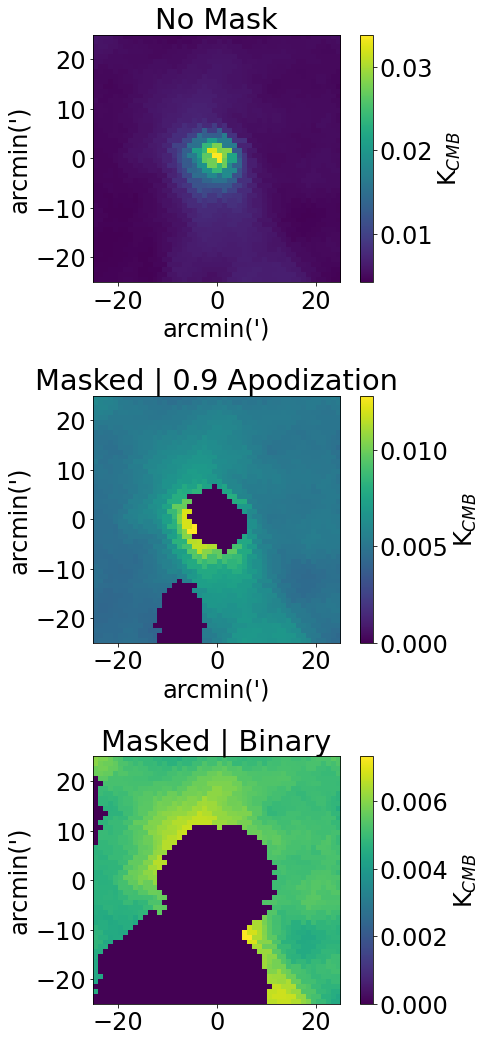

In [5]:
ims = [base_I,masked_I_09,masked_I_binary]

plt.rcParams.update({'font.size': 24})
fig, axs = plt.subplots(3,1,figsize=(10,15),)
for i in range(len(axs.ravel())):
    im = axs.ravel()[i].imshow(ims[i], extent=[-ims[i].shape[1]/2., ims[i].shape[1]/2., -ims[i].shape[0]/2., ims[i].shape[0]/2. ])
    if i == 1 or i == 3:   
        fig.colorbar(im, ax=axs.ravel()[i],fraction=0.046*(ims[i].shape[0]/ims[i].shape[1]), 
                     pad=0.035, label = "K$_{CMB}$")
    else:
        fig.colorbar(im, ax=axs.ravel()[i],fraction=0.046*(ims[i].shape[0]/ims[i].shape[1]), 
                     pad=0.035, label = "K$_{CMB}$")
        

axs[0].set_title('No Mask')
axs[1].set_title('Masked | 0.9 Apodization')
axs[2].set_title('Masked | Binary')
axs[0].set_xlabel("arcmin(')")
axs[1].set_xlabel("arcmin(')")
axs[2].set_ylabel("arcmin(')")
axs[0].set_ylabel("arcmin(')")
axs[1].set_ylabel("arcmin(')")
axs[2].set_ylabel("arcmin(')")
plt.tight_layout()
plt.show()